### Telecomunicaciones

Las telecomunicaciones se refieren a la transmisión de información a través de medios electrónicos, como la telefonía, la televisión, la radio y, más recientemente, el internet. Estos medios de comunicación permiten la transmisión de información entre personas, organizaciones y dispositivos a largas distancias.

El internet, por su parte, es una red global de computadoras interconectadas que permite el intercambio de información en tiempo real. Desde su creación, ha tenido un impacto significativo en la vida de las personas, transformando la manera en que nos comunicamos, trabajamos, aprendemos y nos entretenemos.

La industria de las telecomunicaciones ha jugado un papel vital en nuestra sociedad, facilitando la información a escala internacional y permitiendo la comunicación continua incluso en medio de una pandemia mundial. La transferencia de datos y comunicación se realiza en su mayoría a través de internet, líneas telefónicas fijas, telefonía móvil, y en casi cualquier lugar del mundo.

En comparación con la media mundial, Argentina está a la vanguardia en el desarrollo de las telecomunicaciones, teniendo para el 2020 un total de 62,12 millones de conexiones.

### ETL 
Para poder iniciar con nuestro análisis primero debemos de explorar nuestros datos en busca de valores faltantes, outliers o registros duplicados

In [1]:
# Importamos las librerias necesarias para nuestro ETL
import warnings
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()

In [2]:
# Extremos los nombre de las hojas que hay en el excel
nombres = pd.ExcelFile('../Data/Internet.xlsx')
# Imprimimos los nombres de cada hoja
print(nombres.sheet_names)

['Acc_vel_loc_sinrangos', 'Velocidad_sin_Rangos', 'Accesos_tecnologia_localidad', 'Velocidad % por prov', 'Totales VMD', 'Totales Accesos Por Tecnología', 'Accesos Por Tecnología', 'Penetración-poblacion', 'Penetracion-hogares', 'Penetracion-totales', 'Totales Accesos por velocidad', 'Accesos por velocidad', 'Dial-BAf', 'Totales Dial-BAf', 'Ingresos ']


Tomamos las hojas que son mas relevantes para el análisis

In [3]:
df_Internet_Velocidad = pd.read_excel('../Data/Internet.xlsx', sheet_name='Velocidad % por prov')
df_Internet_ATecnologia = pd.read_excel('../Data/Internet.xlsx', sheet_name='Accesos Por Tecnología')
df_Internet_PPoblacion = pd.read_excel('../Data/Internet.xlsx', sheet_name='Penetración-poblacion')
df_Internet_PHogares = pd.read_excel('../Data/Internet.xlsx', sheet_name='Penetracion-hogares')
df_Internet_AVelocidad = pd.read_excel('../Data/Internet.xlsx', sheet_name='Accesos por velocidad')
df_Internet_Dial = pd.read_excel('../Data/Internet.xlsx', sheet_name='Dial-BAf')
df_Internet_Ingresos = pd.read_excel('../Data/Internet.xlsx', sheet_name='Ingresos ')
"""df_mapa_conectividad = pd.read_excel('../Data/mapa_conectividad.xlsx')
df_Portabilidad = pd.read_excel('../Data/Portabilidad.xlsx')
df_servicios = pd.read_excel('../Data/servicios_postales.xlsx')
df_telefoniaF = pd.read_excel('../Data/telefonia_fija.xlsx')
df_telefoniaM = pd.read_excel('../Data/Telefonia_movil.xlsx')
df_televición = pd.read_excel('../Data/Television.xlsx')"""

"df_mapa_conectividad = pd.read_excel('../Data/mapa_conectividad.xlsx')\ndf_Portabilidad = pd.read_excel('../Data/Portabilidad.xlsx')\ndf_servicios = pd.read_excel('../Data/servicios_postales.xlsx')\ndf_telefoniaF = pd.read_excel('../Data/telefonia_fija.xlsx')\ndf_telefoniaM = pd.read_excel('../Data/Telefonia_movil.xlsx')\ndf_televición = pd.read_excel('../Data/Television.xlsx')"

Para este análisis vamos a utilizar 8 de las 15 hojas donde podemos abordar la mayor cantidad de información sin sobre cargarnos de más datos.
Iniciamos validando que nuestros dataset tengan los datos bien estructurados sin outliers, valores faltantes o duplicados

1. Hacemos un recorrido por las diferentes hojas para detectar valores nulos

In [4]:
df_Internet_Velocidad.info()
# Podemos descartar la existencia de valores faltantes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Año                     984 non-null    int64  
 1   Trimestre               984 non-null    int64  
 2   Provincia               984 non-null    object 
 3   Mbps (Media de bajada)  984 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 30.9+ KB


In [5]:
df_Internet_ATecnologia.info()
# En este encontramos vales faltantes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Año           985 non-null    object 
 1   Trimestre     985 non-null    object 
 2   Provincia     984 non-null    object 
 3   ADSL          984 non-null    float64
 4   Cablemodem    984 non-null    float64
 5   Fibra óptica  984 non-null    float64
 6   Wireless      984 non-null    float64
 7   Otros         984 non-null    float64
 8   Total         984 non-null    float64
dtypes: float64(6), object(3)
memory usage: 69.5+ KB


In [6]:
# Revisamos que filas tiene valores nulos
filas_con_nulos = df_Internet_ATecnologia[df_Internet_ATecnologia.isnull().any(axis=1)]
filas_con_nulos
# Obtenemos dos filas de valores nulos 

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
984,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
985,*,Los datos provinciales no coinciden a nivel na...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Procedemos en borrar las filas con valores nulos 
df_Internet_ATecnologia = df_Internet_ATecnologia.dropna()
df_Internet_ATecnologia.info()

<class 'pandas.core.frame.DataFrame'>
Index: 984 entries, 0 to 983
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Año           984 non-null    object 
 1   Trimestre     984 non-null    object 
 2   Provincia     984 non-null    object 
 3   ADSL          984 non-null    float64
 4   Cablemodem    984 non-null    float64
 5   Fibra óptica  984 non-null    float64
 6   Wireless      984 non-null    float64
 7   Otros         984 non-null    float64
 8   Total         984 non-null    float64
dtypes: float64(6), object(3)
memory usage: 76.9+ KB


In [8]:
df_Internet_PPoblacion.info()
# Validamos que no tenemos valores nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Año                       984 non-null    int64  
 1   Trimestre                 984 non-null    int64  
 2   Provincia                 984 non-null    object 
 3   Accesos por cada 100 hab  984 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 30.9+ KB


In [9]:
df_Internet_PHogares.info()
# Validamos que no tengamos valores nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           984 non-null    int64  
 1   Trimestre                     984 non-null    int64  
 2   Provincia                     984 non-null    object 
 3   Accesos por cada 100 hogares  984 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 30.9+ KB


In [10]:
df_Internet_AVelocidad.info()
# Encontramos valores nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Año                  984 non-null    int64  
 1   Trimestre            984 non-null    int64  
 2   Provincia            984 non-null    object 
 3   HASTA 512 kbps       984 non-null    float64
 4   + 512 Kbps - 1 Mbps  984 non-null    float64
 5   + 1 Mbps - 6 Mbps    984 non-null    float64
 6   + 6 Mbps - 10 Mbps   984 non-null    float64
 7   + 10 Mbps - 20 Mbps  984 non-null    float64
 8   + 20 Mbps - 30 Mbps  984 non-null    float64
 9   + 30 Mbps            984 non-null    float64
 10  OTROS                978 non-null    float64
 11  Total                984 non-null    float64
dtypes: float64(9), int64(2), object(1)
memory usage: 92.4+ KB


In [11]:
filas_con_nulos = df_Internet_AVelocidad[df_Internet_AVelocidad.isnull().any(axis=1)]
filas_con_nulos
# Obtenemos solo las filas que tienen valores nulos, nos encontramos que los valores nulos estan en la columna otros y al intepretar podemos decir que en estas reguiones no hay un rango de otros por lo que podemos tomar ese valor nulo como 0

,Año,Trimestre,Provincia,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total
457,2019,2,Capital Federal,74.0,1027.0,281370.0,124087.0,239691.0,296155.0,475991.0,NaN,1418395.0
467,2019,2,La Rioja,9.0,11.0,39819.0,4297.0,4857.0,13.0,1298.0,NaN,50304.0
468,2019,2,Mendoza,20.0,2522.0,205165.0,2971.0,10092.0,1256.0,234.0,NaN,222260.0
475,2019,2,Santa Cruz,25.0,84.0,24861.0,3806.0,1202.0,28.0,4.0,NaN,30010.0
478,2019,2,Tierra Del Fuego,6.0,123.0,41824.0,4241.0,1573.0,96.0,32.0,NaN,47895.0
479,2019,2,Tucumán,16.0,157.0,78891.0,44296.0,24291.0,628.0,18394.0,NaN,166673.0


In [12]:
# Trasformamos los valores nulos en 0
df_Internet_AVelocidad = df_Internet_AVelocidad.fillna(0)

In [13]:
# Sin valores nulos
df_Internet_AVelocidad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Año                  984 non-null    int64  
 1   Trimestre            984 non-null    int64  
 2   Provincia            984 non-null    object 
 3   HASTA 512 kbps       984 non-null    float64
 4   + 512 Kbps - 1 Mbps  984 non-null    float64
 5   + 1 Mbps - 6 Mbps    984 non-null    float64
 6   + 6 Mbps - 10 Mbps   984 non-null    float64
 7   + 10 Mbps - 20 Mbps  984 non-null    float64
 8   + 20 Mbps - 30 Mbps  984 non-null    float64
 9   + 30 Mbps            984 non-null    float64
 10  OTROS                984 non-null    float64
 11  Total                984 non-null    float64
dtypes: float64(9), int64(2), object(1)
memory usage: 92.4+ KB


In [14]:
df_Internet_Dial.info()
# Encontramos valores nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Año               984 non-null    int64  
 1   Trimestre         984 non-null    int64  
 2   Provincia         984 non-null    object 
 3   Banda ancha fija  984 non-null    int64  
 4   Dial up           982 non-null    float64
 5   Total             984 non-null    int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 46.2+ KB


In [15]:
# Al revisar las filas con valores nulo podemos ver que los valores nulos hacer representación de 0
filas_con_nulos = df_Internet_Dial[df_Internet_Dial.isnull().any(axis=1)]
filas_con_nulos

,Año,Trimestre,Provincia,Banda ancha fija,Dial up,Total
560,2018,2,Formosa,44554,NaN,44554
565,2018,2,Misiones,106147,NaN,106147


In [16]:
# Transformamos los nulos en 0
df_Internet_Dial = df_Internet_Dial.fillna(0)
df_Internet_Dial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Año               984 non-null    int64  
 1   Trimestre         984 non-null    int64  
 2   Provincia         984 non-null    object 
 3   Banda ancha fija  984 non-null    int64  
 4   Dial up           984 non-null    float64
 5   Total             984 non-null    int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 46.2+ KB


In [17]:
# No encontramos valores nulos 
df_Internet_Ingresos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Año                        41 non-null     int64  
 1   Trimestre                  41 non-null     int64  
 2   Ingresos (miles de pesos)  41 non-null     float64
 3   Periodo                    41 non-null     object 
dtypes: float64(1), int64(2), object(1)
memory usage: 1.4+ KB


Pasamos a una revición profunda de los datos para obtener un panorama diferente y obtener un mejor ánalisis

In [18]:
df_Internet_Velocidad.describe()
# Utilizamos describe para tener un entorno gloval de los datos y encontramos que en Mbps tenemos valores muy altos que podriamos considera outliers, pero primero los vamos a identificar

,Año,Trimestre,Mbps (Media de bajada)
count,984.000000,984.000000,984.000000
mean,2018.634146,2.463415,23.186898
std,2.962686,1.128870,31.623977
min,2014.000000,1.000000,2.573729
25%,2016.000000,1.000000,4.762379
50%,2019.000000,2.000000,9.307228
75%,2021.000000,3.000000,27.636730
max,2024.000000,4.000000,234.440000


In [19]:
# Validamos que no existan valores duplicados
duplicados  = df_Internet_Velocidad.duplicated()
lista_duplicados = df_Internet_Velocidad[duplicados]
lista_duplicados

,Año,Trimestre,Provincia,Mbps (Media de bajada)


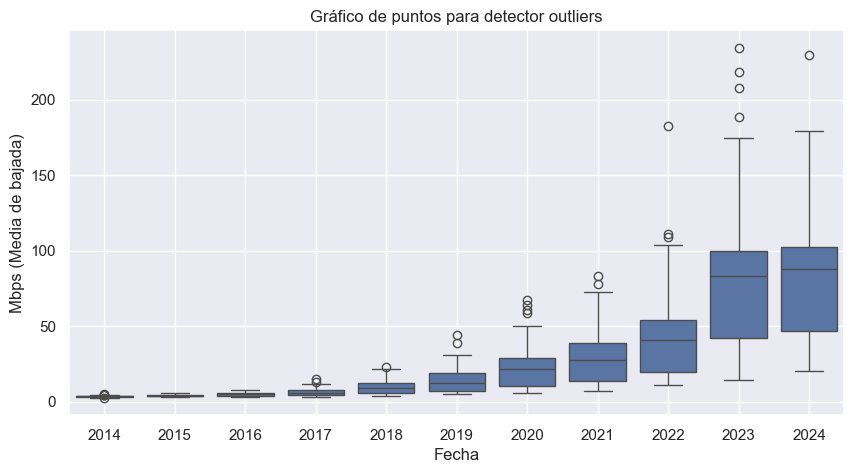

In [20]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Año', y='Mbps (Media de bajada)', data=df_Internet_Velocidad)
plt.xlabel('Fecha')
plt.ylabel('Mbps (Media de bajada)')
plt.title('Gráfico de puntos para detector outliers')
plt.grid(True)
plt.show()
# Por medio de este grafico podemos pasar el tema de análisis donde como podemos ver los Mbps se an ingrementado al paso de los años por lo que aun no podemos decir que los valores altos sean outliers

En busca de outliers podemos ver en el anterior grafico como despues de el año 2017 se percibe un incremento en las Mbps 

In [21]:
# Buscamos las provincias unicas y encontramos que Buenos aires y capital Federal se refiere a la misma provincia 
Unicos = df_Internet_Velocidad['Provincia'].unique()
Unicos

array(['Buenos Aires', 'Capital Federal', 'Catamarca', 'Chaco', 'Chubut',
       'Córdoba', 'Corrientes', 'Entre Ríos', 'Formosa', 'Jujuy',
       'La Pampa', 'La Rioja', 'Mendoza', 'Misiones', 'Neuquén',
       'Río Negro', 'Salta', 'San Juan', 'San Luis', 'Santa Cruz',
       'Santa Fe', 'Santiago Del Estero', 'Tierra Del Fuego', 'Tucumán'],
      dtype=object)

In [22]:
# Lo que hacemos es estandarizar el nombre de Capital Federal por Buenos Aires 
warnings.filterwarnings("ignore")
for i in range(0, len(df_Internet_Velocidad)):
    if df_Internet_Velocidad['Provincia'][i] == 'Capital Federal':
        df_Internet_Velocidad['Provincia'][i] = 'Buenos Aires'

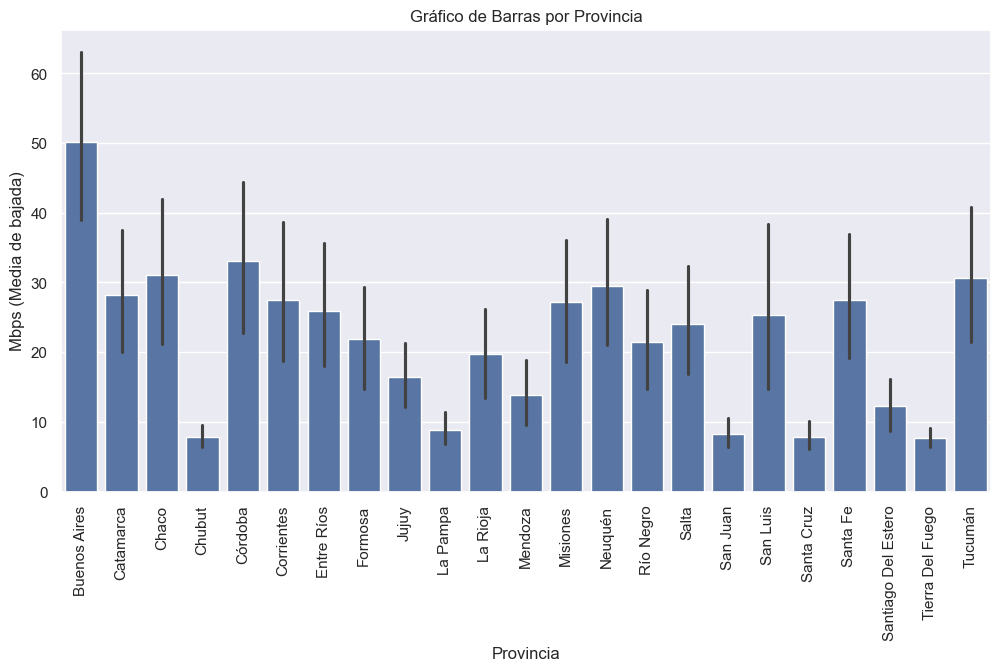

In [23]:
# Podemos descartar la opción de outliers y queda como análisis que en los ultimos años an subido los Mbps, donde una de las provincias donde se ha visto mayormente este aumento es en buenos Aires ya que hablamos de la capital
plt.figure(figsize=(12, 6))
sns.barplot(x='Provincia', y='Mbps (Media de bajada)', data=df_Internet_Velocidad)
plt.xticks(rotation=90)
plt.xlabel('Provincia')
plt.ylabel('Mbps (Media de bajada)')
plt.title('Gráfico de Barras por Provincia')
plt.show()

En el anterior grafico podemos ver en que regiones hay mayor incremento de los Mbps donde Buenos aires es la provincia con un mayor incremento.

In [24]:
# Creamos una función que realize la transformación con trimestre y años a fecha
def Crear_fecha(row):
    año = row['Año']
    trimestre = row['Trimestre']
      # Crear una fecha para el primer día del trimestre
    if trimestre == 1:
        return pd.to_datetime(f'{año}-01-01')
    elif trimestre == 2:
        return pd.to_datetime(f'{año}-04-01')
    elif trimestre == 3:
        return pd.to_datetime(f'{año}-07-01')
    elif trimestre == 4:
        return pd.to_datetime(f'{año}-10-01')

In [25]:
# Utilizamos la función para aplicarla y obtener la transformación a fecha
df_Internet_Velocidad['Fecha'] = df_Internet_Velocidad.apply(Crear_fecha, axis=1)

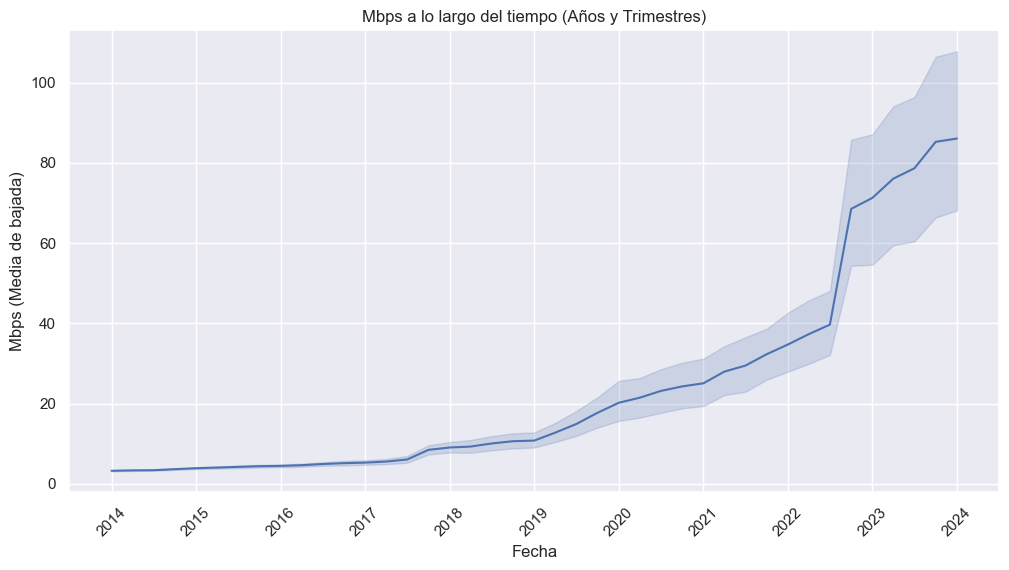

In [26]:
# Crear un gráfico de líneas con Seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_Internet_Velocidad, x='Fecha', y='Mbps (Media de bajada)')

# Añadir etiquetas y título
plt.xlabel('Fecha')
plt.ylabel('Mbps (Media de bajada)')
plt.title('Mbps a lo largo del tiempo (Años y Trimestres)')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()
# Podemos ver el incremento en los Mbps desde el 2017 

En el anterior grafico podemos ver como al pasar de los años se a ingrementado los Mbps con una disperción mas grande 

In [27]:
# Validamos que no existan valores duplicados
duplicados  = df_Internet_ATecnologia.duplicated()
lista_duplicados = df_Internet_ATecnologia[duplicados]
lista_duplicados

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total


In [28]:
 # Descrisión global de lo que tenemos en nuestro datset
df_Internet_ATecnologia.describe()

,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
count,9.840000e+02,9.840000e+02,9.840000e+02,984.000000,984.000000,9.840000e+02
mean,1.150317e+05,1.832892e+05,4.728246e+04,12385.282520,6556.766260,3.645454e+05
std,2.385989e+05,4.500403e+05,1.762796e+05,20996.226278,11567.922012,7.847271e+05
min,2.827000e+03,0.000000e+00,0.000000e+00,0.000000,2.000000,1.255700e+04
25%,2.076400e+04,1.085600e+04,3.540000e+02,734.000000,332.000000,6.177975e+04
50%,4.452300e+04,4.014950e+04,2.581000e+03,5105.500000,1901.000000,1.124190e+05
75%,9.148125e+04,7.582350e+04,2.554050e+04,14034.750000,7546.500000,1.927940e+05
max,1.586343e+06,2.797700e+06,1.799013e+06,150290.000000,101294.000000,5.044557e+06


In [29]:
# Convertimos los valores de trimestres en int, pero antes corregimos errores
df_Internet_ATecnologia['Trimestre'] = df_Internet_ATecnologia['Trimestre'].astype(str).str.replace(' *', '', regex=False)
df_Internet_ATecnologia['Trimestre'] = df_Internet_ATecnologia['Trimestre'].astype('Int16')

In [30]:
# Convertir los valores de año a un tipo númerico 
df_Internet_ATecnologia['Año'] = df_Internet_ATecnologia['Año'].astype(str).str.replace(' *', '', regex=False)
df_Internet_ATecnologia['Año'] = pd.to_datetime(df_Internet_ATecnologia['Año'], format='%Y',  errors='coerce').dt.year
df_Internet_ATecnologia['Año'] = df_Internet_ATecnologia['Año'].astype('Int16')

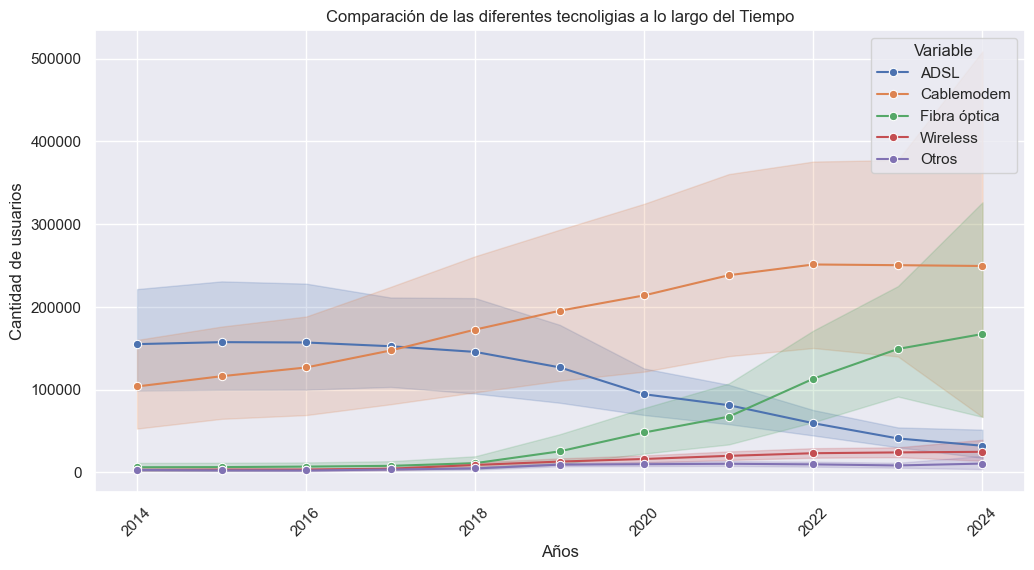

In [31]:
# Crear el gráfico de líneas
# Transformar el DataFrame a formato largo
df_Intr = df_Internet_ATecnologia.melt(id_vars=['Año'], value_vars=['ADSL', 'Cablemodem', 'Fibra óptica',
       'Wireless', 'Otros'], 
                    var_name='Variable', value_name='Valor')

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_Intr, x='Año', y='Valor', hue='Variable', marker='o')

# Añadir etiquetas y título
plt.xlabel('Años')
plt.ylabel('Cantidad de usuarios')
plt.title('Comparación de las diferentes tecnoligias a lo largo del Tiempo')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

En el anterior grafico podemos ver como algunas tecnologías han tenido un ingremento interesante como la fibra óptica y el CableModen, tambiem podemos apreciar como algunas tecnologías han decrementado como es el caso de ADSL y las demas que han ingrementado pero no ha sido tan notorio.

In [32]:
# Utilizamos la función de trasformación de años y trimestres a fechas
df_Internet_ATecnologia['Fecha'] = df_Internet_ATecnologia.apply(Crear_fecha, axis=1)

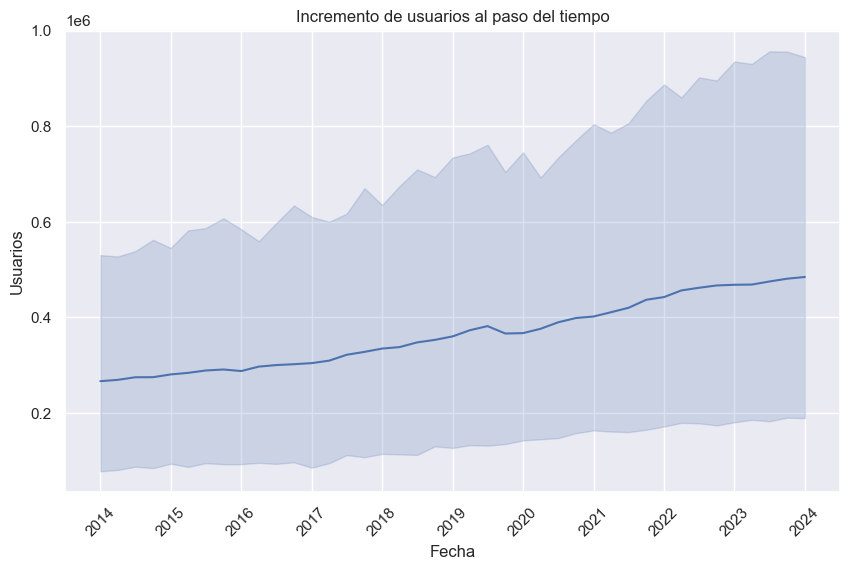

In [33]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_Internet_ATecnologia, x='Fecha', y='Total')
# Añadir etiquetas y título
plt.xlabel('Fecha')
plt.ylabel('Usuarios')
plt.title('Incremento de usuarios al paso del tiempo')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

En el anterior grafico anterior podemos ver una gran disperción de los datos esto debido a que existen unas regiones donde se presenta una concentración mayor de usuarios, tambiem podemos ver un ingremento considerable a nivel gloval

In [34]:
# Encontramos que existe dos categorias que se refieren a lo mismo capital federal y Buenos Aires
unicos = df_Internet_ATecnologia['Provincia'].unique()
unicos

array(['Buenos Aires', 'Capital Federal', 'Catamarca', 'Chaco', 'Chubut',
       'Córdoba', 'Corrientes', 'Entre Ríos', 'Formosa', 'Jujuy',
       'La Pampa', 'La Rioja', 'Mendoza', 'Misiones', 'Neuquén',
       'Río Negro', 'Salta', 'San Juan', 'San Luis', 'Santa Cruz',
       'Santa Fe', 'Santiago Del Estero', 'Tierra Del Fuego', 'Tucumán'],
      dtype=object)

In [35]:
# Estandarizamos los nombres de las provincias 
for i in range(len(df_Internet_ATecnologia)):
    if df_Internet_ATecnologia['Provincia'][i] == 'Capital Federal':
        df_Internet_ATecnologia['Provincia'][i] = 'Buenos Aires'
pass

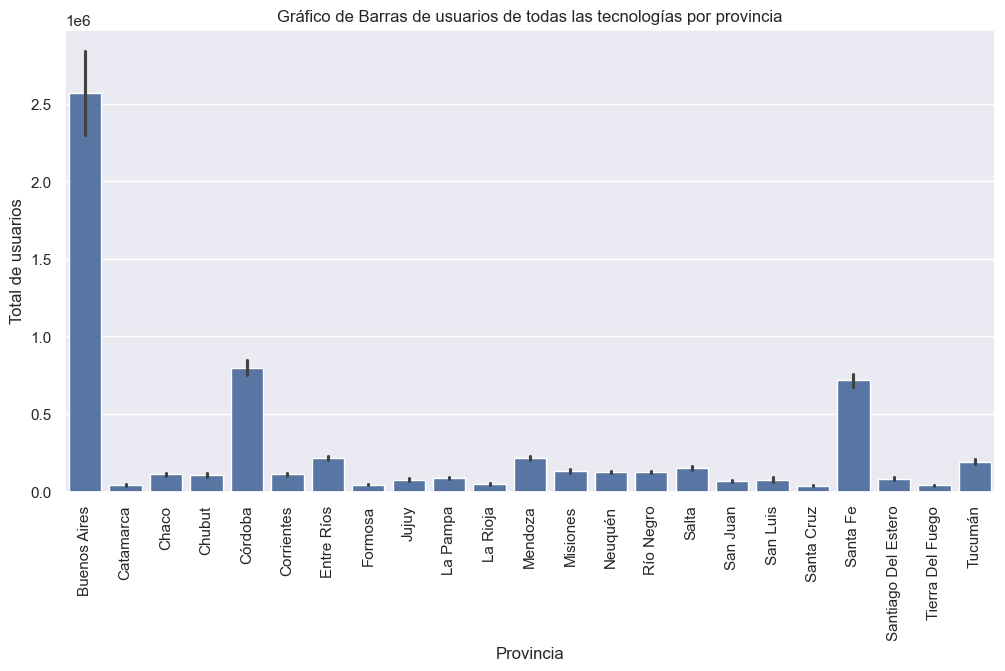

In [36]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Provincia', y='Total', data=df_Internet_ATecnologia)
plt.xticks(rotation=90)
plt.xlabel('Provincia')
plt.ylabel('Total de usuarios')
plt.title('Gráfico de Barras de usuarios de todas las tecnologías por provincia')
plt.show()

En el anterior grafico podemos ver como hay algulnas provincias tienen una mayor concentración de los usuarios que las demás

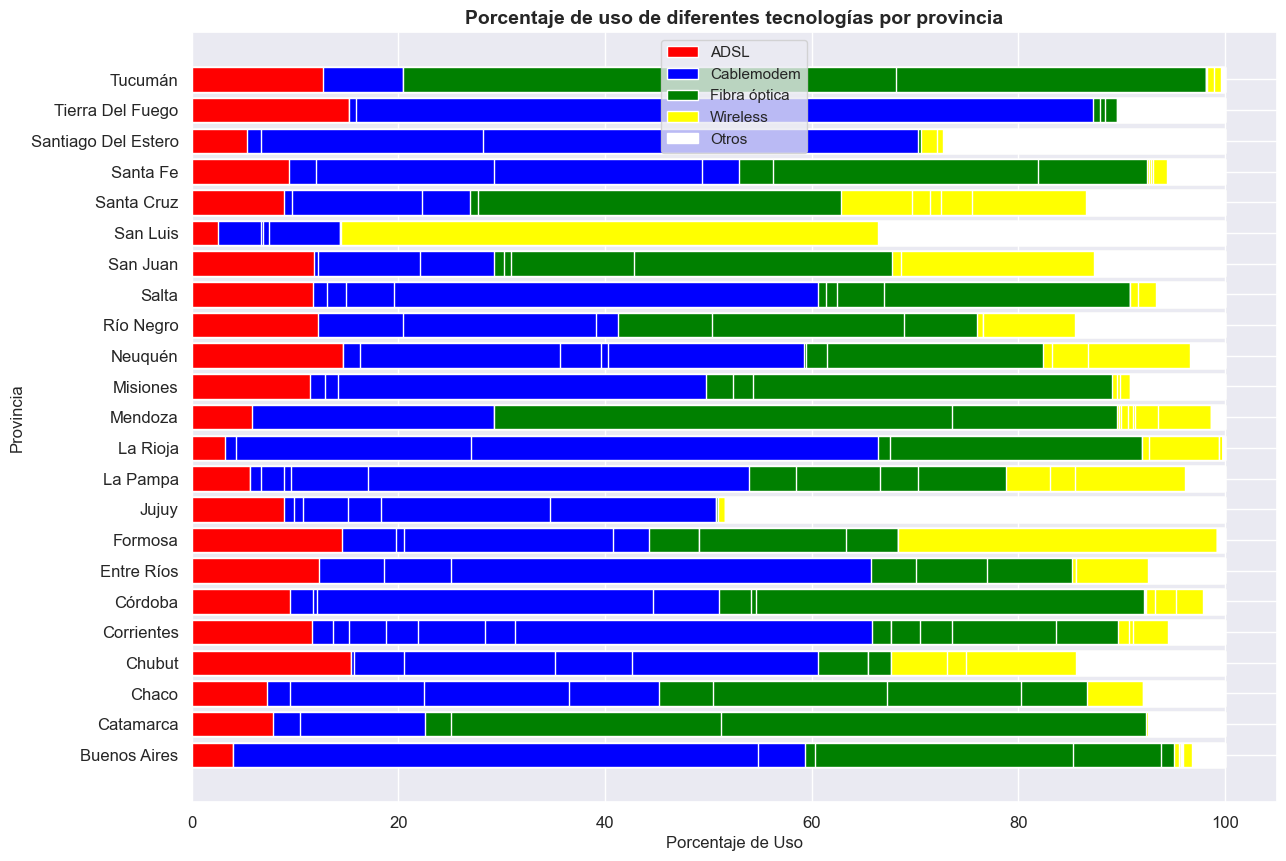

In [37]:
# Calcular el total de cada fila
df_Internet_ATecnologia['Total1'] = df_Internet_ATecnologia[['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']].sum(axis=1)

# Calcular los porcentajes
df_Internet_ATecnologia['Tecnología A %'] = df_Internet_ATecnologia['ADSL'] / df_Internet_ATecnologia['Total1'] * 100
df_Internet_ATecnologia['Tecnología B %'] = df_Internet_ATecnologia['Cablemodem'] / df_Internet_ATecnologia['Total1'] * 100
df_Internet_ATecnologia['Tecnología C %'] = df_Internet_ATecnologia['Fibra óptica'] / df_Internet_ATecnologia['Total1'] * 100
df_Internet_ATecnologia['Tecnología D %'] = df_Internet_ATecnologia['Wireless'] / df_Internet_ATecnologia['Total1'] * 100
df_Internet_ATecnologia['Tecnología E %'] = df_Internet_ATecnologia['Otros'] / df_Internet_ATecnologia['Total1'] * 100

# Crear un DataFrame con solo las columnas de porcentaje y la provincia
df_percent = df_Internet_ATecnologia[['Provincia', 'Tecnología A %', 'Tecnología B %', 'Tecnología C %', 'Tecnología D %', 'Tecnología E %']]

# Ordenar por el total
df_percent = df_percent.sort_values(by='Provincia')

# Configuración del gráfico
fig, ax = plt.subplots(figsize=(14, 10))

# Crear las barras apiladas
provincias = df_percent['Provincia']
tecnologia_a = df_percent['Tecnología A %']
tecnologia_b = df_percent['Tecnología B %']
tecnologia_c = df_percent['Tecnología C %']
tecnologia_d = df_percent['Tecnología D %']
tecnologia_e = df_percent['Tecnología E %']

# Graficar cada segmento
bars1 = ax.barh(provincias, tecnologia_a, color='red', label='ADSL')
bars2 = ax.barh(provincias, tecnologia_b, left=tecnologia_a, color='blue', label='Cablemodem')
bars3 = ax.barh(provincias, tecnologia_c, left=tecnologia_a + tecnologia_b, color='green', label='Fibra óptica')
bars4 = ax.barh(provincias, tecnologia_d, left=tecnologia_a + tecnologia_b + tecnologia_c, color='yellow', label='Wireless')
bars5 = ax.barh(provincias, tecnologia_e, left=tecnologia_a + tecnologia_b + tecnologia_c + tecnologia_d, color='white', label='Otros')
# Añadir etiquetas y título
ax.set_xlabel('Porcentaje de Uso', fontsize=12)
ax.set_ylabel('Provincia', fontsize=12)
ax.set_title('Porcentaje de uso de diferentes tecnologías por provincia', fontsize=14, fontweight='bold')
ax.legend(loc='best')

# Mejorar el diseño de las etiquetas del eje y
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)

# Mostrar el gráfico
plt.show()


En al anterior grafico podemos ver por providencia en uso de las diferentes tecnologías, podemos concluir que en alguans providencias existe ausensia de algunas tecnologías que en su estudio han demostrado un gran acogimiento como es el caso de la fibra optica, que unos anos a optenido un avance cercano a cable moden el cual se encuentra liderando

In [38]:
df_Internet_PPoblacion.describe()
# Lo primero es mirar de manera gloval nuestros datos

,Año,Trimestre,Accesos por cada 100 hab
count,984.000000,984.000000,984.000000
mean,2018.634146,2.463415,15.537902
std,2.962686,1.128870,9.205334
min,2014.000000,1.000000,2.684669
25%,2016.000000,1.000000,8.909018
50%,2019.000000,2.000000,13.571293
75%,2021.000000,3.000000,19.972549
max,2024.000000,4.000000,52.236739


In [39]:
# Validamos que no existan valores duplicados
duplicados  = df_Internet_PPoblacion.duplicated()
lista_duplicados = df_Internet_PPoblacion[duplicados]
lista_duplicados

,Año,Trimestre,Provincia,Accesos por cada 100 hab


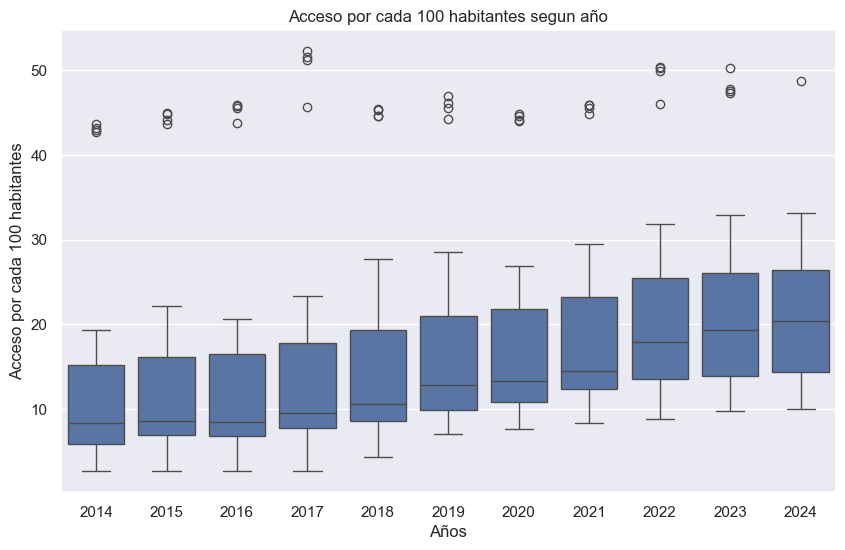

In [40]:
# Grafico para ver la probabilidad de que tengamos outliers
plt.figure(figsize=(10,6))
sns.boxplot(x='Año', y='Accesos por cada 100 hab', data=df_Internet_PPoblacion)
plt.title('Acceso por cada 100 habitantes segun año')
plt.xlabel('Años')
plt.ylabel('Acceso por cada 100 habitantes')
plt.show()

En el anterior grafico podemos ver que hay muchos valores que sobre salen y que podrian ser outliers, tambien podemos ver que se ha visto un gran incremento en la cantidad de nuevos usuarios.

In [41]:
# Estandarizamos los nombres de las provincias 
for i in range(len(df_Internet_PPoblacion)):
    if df_Internet_PPoblacion['Provincia'][i] == 'Capital Federal':
        df_Internet_PPoblacion['Provincia'][i] = 'Buenos Aires'


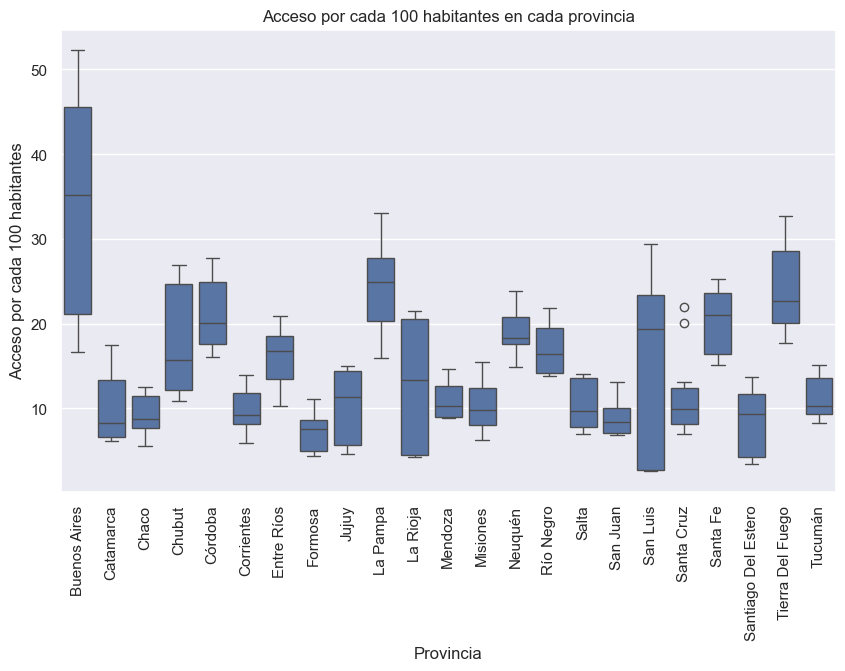

In [42]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Provincia', y='Accesos por cada 100 hab', data=df_Internet_PPoblacion)
plt.title('Acceso por cada 100 habitantes en cada provincia')
plt.xlabel('Provincia')
plt.xticks(rotation= 90)
plt.ylabel('Acceso por cada 100 habitantes')
plt.show()

Por medio del anterior grafico podemos decir que los valores que teniamos muy altos estan dados por Buenos Aires donde muestra un mayor incremento de acceso a interned

In [43]:
# Utilizamos la función para trasformar de años y trimestres a fechas
df_Internet_PPoblacion['Fecha'] = df_Internet_PPoblacion.apply(Crear_fecha, axis=1)

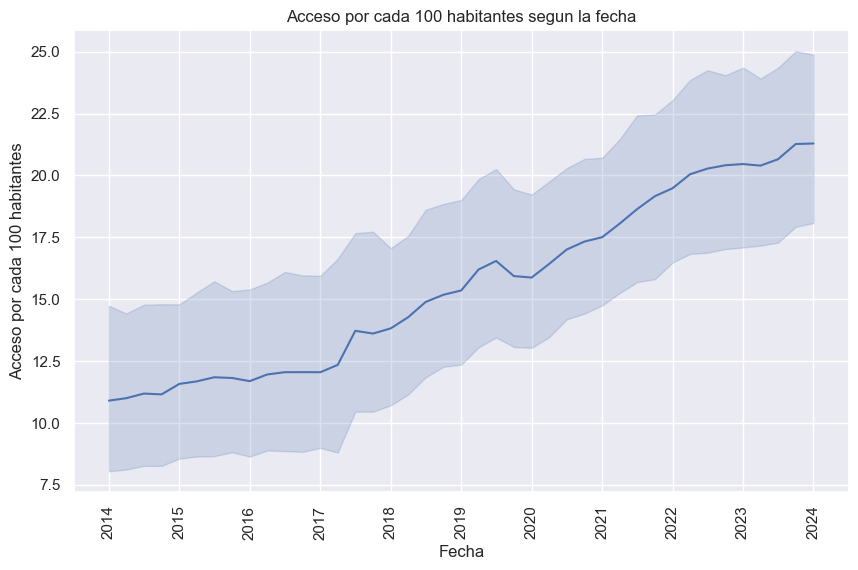

In [44]:
plt.figure(figsize=(10,6))
sns.lineplot(x='Fecha', y='Accesos por cada 100 hab', data=df_Internet_PPoblacion)
plt.title('Acceso por cada 100 habitantes segun la fecha')
plt.xlabel('Fecha')
plt.xticks(rotation= 90)
plt.ylabel('Acceso por cada 100 habitantes')
plt.show()

En el anterior grafico podemos ver el ingremento en las personas que tienen acceso o internet, donde podemos decir que en la actualidad la 3 parte de la población cuanta con este servicio, aunque es algo confuso porque varias personas pueden tener acceso a interned 

In [45]:
# Revisamos los datos de manera gloval
df_Internet_PHogares.describe()
# Encontramos que en acceso por cada 100 hogares contamos con un valor que supera los 100 por lo que puede ser un outliers

,Año,Trimestre,Accesos por cada 100 hogares
count,984.000000,984.000000,984.000000
mean,2018.634146,2.463415,52.159491
std,2.962686,1.128870,24.036101
min,2014.000000,1.000000,9.347208
25%,2016.000000,1.000000,33.204632
50%,2019.000000,2.000000,49.435000
75%,2021.000000,3.000000,65.706626
max,2024.000000,4.000000,124.061394


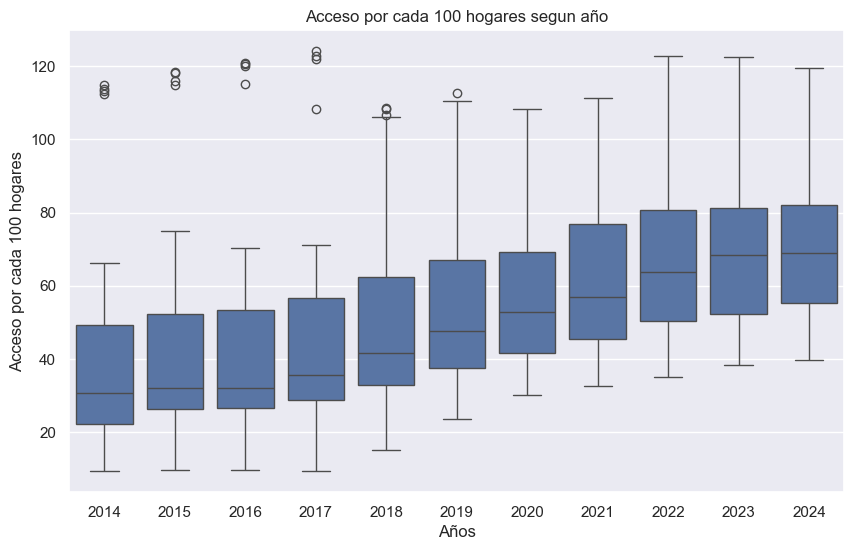

In [46]:
# Validando si hay existencia de outliers
plt.figure(figsize=(10,6))
sns.boxplot(x='Año', y='Accesos por cada 100 hogares', data=df_Internet_PHogares)
plt.title('Acceso por cada 100 hogares segun año')
plt.xlabel('Años')
plt.ylabel('Acceso por cada 100 hogares')
plt.show()

Como primera instancia podemos concluir que los valores que son mayores a 100 son outliers, pero tambien cabe la posibilidad que existan más de un servicio de interned por hogar

In [47]:
for i in range(len(df_Internet_PHogares)):
    if df_Internet_PHogares['Provincia'][i] == 'Capital Federal':
        df_Internet_PHogares['Provincia'][i] = 'Buenos Aires'


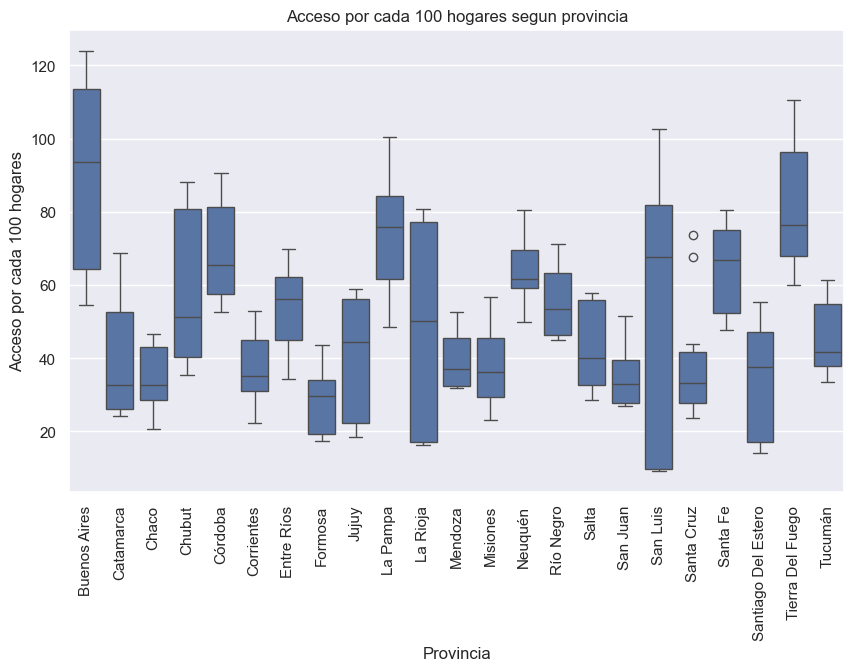

In [48]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Provincia', y='Accesos por cada 100 hogares', data=df_Internet_PHogares)
plt.title('Acceso por cada 100 hogares segun provincia')
plt.xlabel('Provincia')
plt.xticks(rotation= 90)
plt.ylabel('Acceso por cada 100 hogares')
plt.show()

En el siguiente grafico encontramos que los valores mas altos se encuentran en Buenos Aires lo que implicaria que hay hogares que tienen mas de una red de internet por hogar

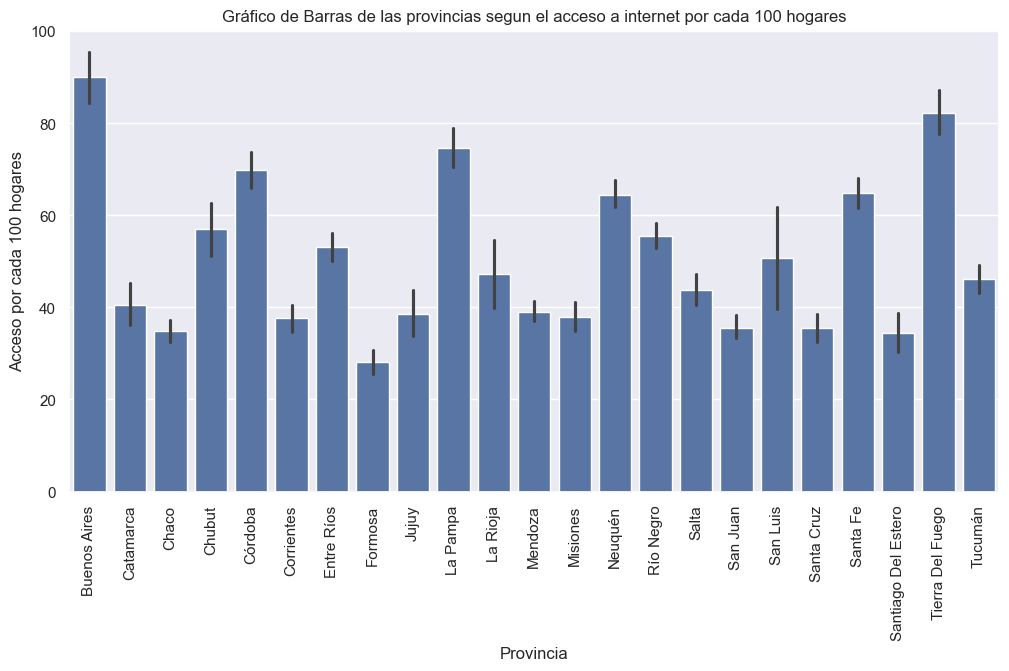

In [49]:
# Grafica de provincias segun acceso a internet de cada 100 hogares 
plt.figure(figsize=(12, 6))
sns.barplot(x='Provincia', y='Accesos por cada 100 hogares', data=df_Internet_PHogares)
plt.xticks(rotation=90)
plt.xlabel('Provincia')
plt.ylabel('Acceso por cada 100 hogares')
plt.title('Gráfico de Barras de las provincias segun el acceso a internet por cada 100 hogares')
plt.show()

En el anterior grafico podemos ver el acceso a internet por cada 100 hogares y podemos ver que hay muchas localidades donde solo el 20% de los hogares tienen acceso a internet

In [50]:
# Utilizamos la función de converción de años y trimestres a fechas
df_Internet_PHogares['Fecha'] = df_Internet_PHogares.apply(Crear_fecha, axis=1)

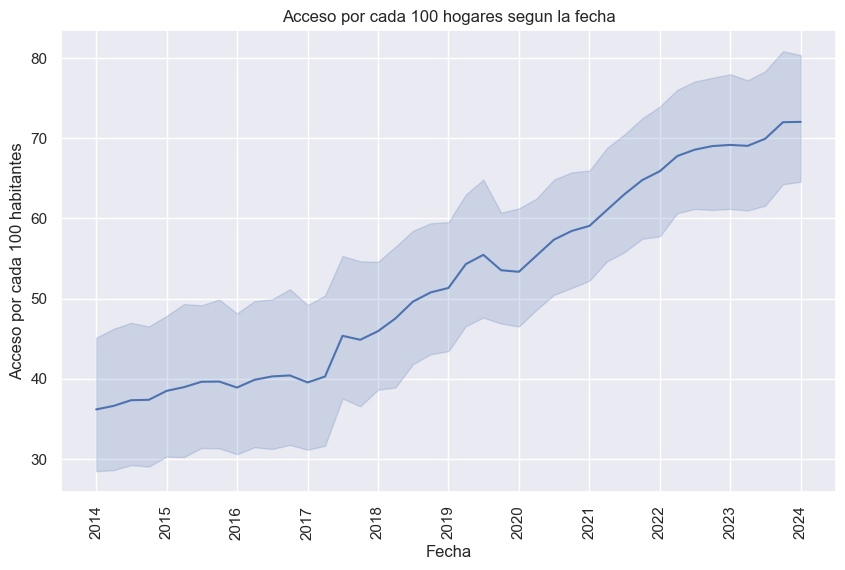

In [51]:
# Grafica de acceso a internet por cada 100 hogares segun el tiempo
plt.figure(figsize=(10,6))
sns.lineplot(x='Fecha', y='Accesos por cada 100 hogares', data=df_Internet_PHogares)
plt.title('Acceso por cada 100 hogares segun la fecha')
plt.xlabel('Fecha')
plt.xticks(rotation= 90)
plt.ylabel('Acceso por cada 100 habitantes')
plt.show()

En el anterior grafico podemos ver como se a ingrementdo el acceso a internet en los hogares, y eso que aun existen providencias con un muy bajo porcentaje de acceso al servicio.

In [52]:
# Damos un vistaso a los datos de manera global
df_Internet_AVelocidad.describe()

,Año,Trimestre,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total
count,984.000000,984.000000,984.000000,984.000000,9.840000e+02,984.000000,984.000000,984.000000,9.840000e+02,984.000000,9.840000e+02
mean,2018.658537,2.463415,1967.099593,9134.977642,1.347227e+05,38149.252033,37076.536585,20064.129065,1.157046e+05,6229.712398,3.630490e+05
std,3.002418,1.128870,12757.059460,20796.531611,3.245957e+05,64289.080670,88748.124134,69777.001896,4.502564e+05,14885.990695,7.810485e+05
min,2014.000000,1.000000,6.000000,0.000000,1.336000e+03,0.000000,0.000000,0.000000,0.000000e+00,-1945.000000,1.240600e+04
25%,2016.000000,1.000000,41.000000,384.750000,2.417200e+04,3662.500000,2336.250000,40.000000,1.175000e+01,0.000000,6.082625e+04
50%,2019.000000,2.000000,107.000000,2217.500000,4.285500e+04,13040.500000,10115.500000,1559.820000,3.272500e+03,114.500000,1.109070e+05
75%,2021.000000,3.000000,467.250000,6946.750000,8.389625e+04,41836.750000,26436.000000,9996.250000,3.894525e+04,6507.750000,1.921040e+05
max,2024.000000,4.000000,238920.000000,171244.480000,2.299705e+06,403575.000000,886678.000000,949093.000000,4.068292e+06,125147.000000,5.044557e+06


In [53]:
# Utilizamos la función de converción de años y trimestres a fechas
df_Internet_AVelocidad['Fecha'] = df_Internet_AVelocidad.apply(Crear_fecha, axis=1)

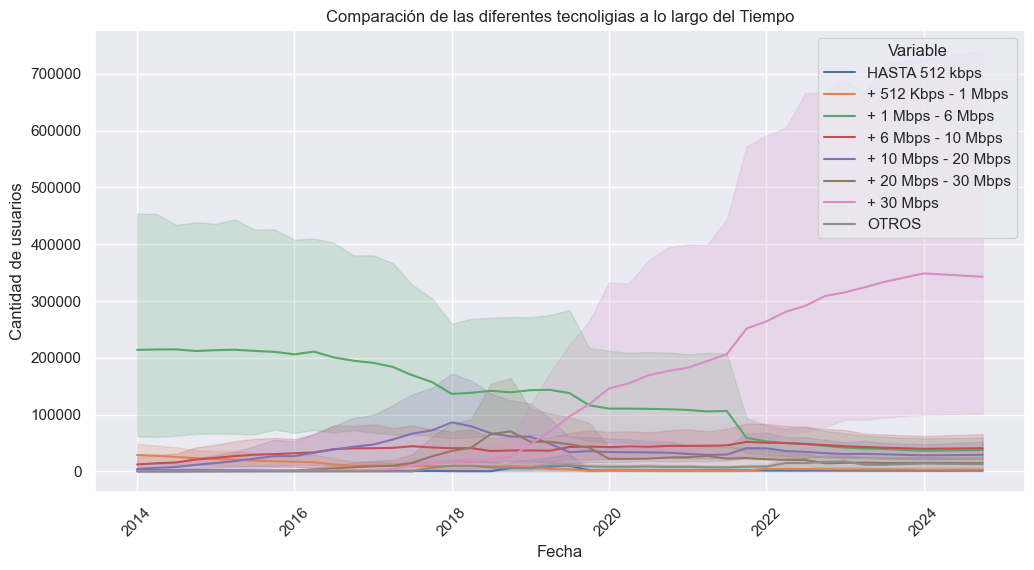

In [54]:
# Crear el gráfico de líneas
# Transformar el DataFrame a formato largo
df_Intr = df_Internet_AVelocidad.melt(id_vars=['Fecha'], value_vars=['HASTA 512 kbps',
       '+ 512 Kbps - 1 Mbps', '+ 1 Mbps - 6 Mbps', '+ 6 Mbps - 10 Mbps',
       '+ 10 Mbps - 20 Mbps', '+ 20 Mbps - 30 Mbps', '+ 30 Mbps', 'OTROS'], 
                    var_name='Variable', value_name='Valor')

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_Intr, x='Fecha', y='Valor', hue='Variable')

# Añadir etiquetas y título
plt.xlabel('Fecha')
plt.ylabel('Cantidad de usuarios')
plt.title('Comparación de las diferentes tecnoligias a lo largo del Tiempo')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

El anterior grafico es algo confuso, pero podemos ver que en los ultimos años los Mbps se han ingrementdo y que la gran mayoria de la población tiene  acceso a las mayores velocidades.

In [55]:
# Damos un vistaso de manera global a los datos
df_Internet_Dial.describe()

,Año,Trimestre,Banda ancha fija,Dial up,Total
count,984.000000,984.000000,9.840000e+02,984.000000,9.840000e+02
mean,2018.634146,2.463415,3.636401e+05,905.279472,3.645454e+05
std,2.962686,1.128870,7.829924e+05,2289.848126,7.847271e+05
min,2014.000000,1.000000,1.219300e+04,0.000000,1.255700e+04
25%,2016.000000,1.000000,6.163725e+04,5.000000,6.177975e+04
50%,2019.000000,2.000000,1.116815e+05,135.000000,1.124190e+05
75%,2021.000000,3.000000,1.921412e+05,615.000000,1.927940e+05
max,2024.000000,4.000000,5.038657e+06,15229.000000,5.044557e+06


In [57]:
# Utilizamos la función de converción de años y trimestres a fechas
df_Internet_Dial['Fecha'] = df_Internet_Dial.apply(Crear_fecha, axis=1)

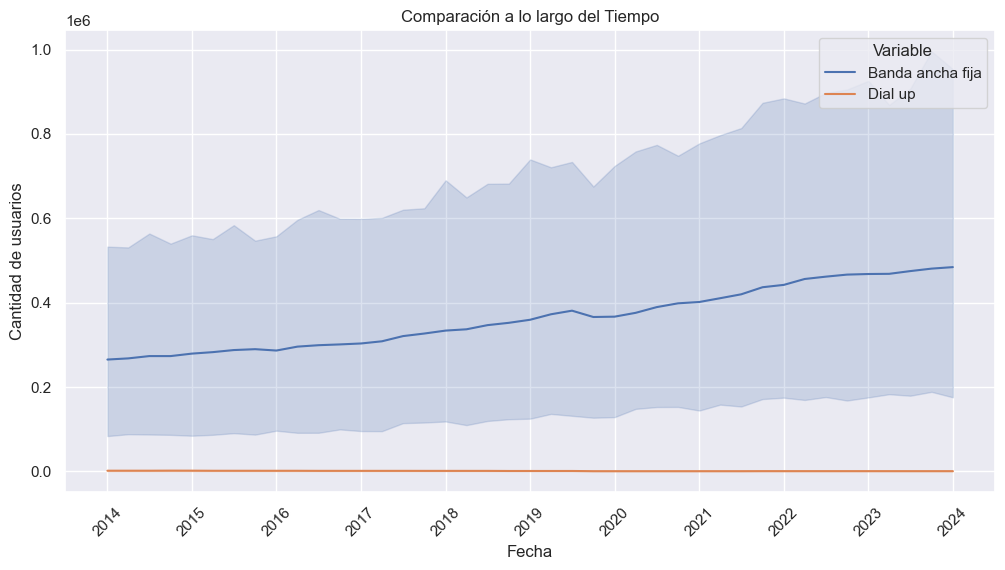

In [58]:
# Crear el gráfico de líneas
# Transformar el DataFrame a formato largo
df_Intr = df_Internet_Dial.melt(id_vars=['Fecha'], value_vars=['Banda ancha fija', 'Dial up'], 
                    var_name='Variable', value_name='Valor')

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_Intr, x='Fecha', y='Valor', hue='Variable')

# Añadir etiquetas y título
plt.xlabel('Fecha')
plt.ylabel('Cantidad de usuarios')
plt.title('Comparación a lo largo del Tiempo')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

En el anterior grafico podemos ver como banda ancha es la que lidera en comparación Dial up que tiene una minima de usuarios

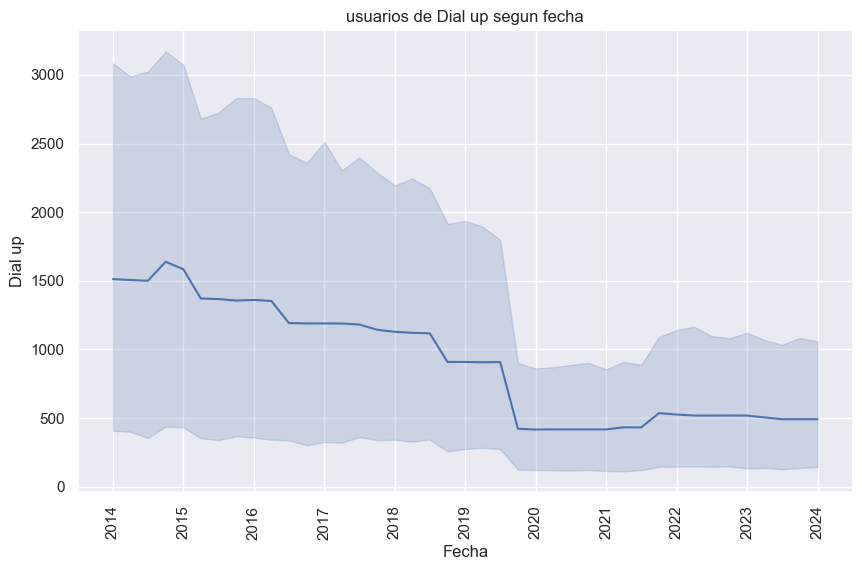

In [59]:
# Grafica de Dial up
plt.figure(figsize=(10,6))
sns.lineplot(x='Fecha', y='Dial up', data=df_Internet_Dial)
plt.title('usuarios de Dial up segun fecha')
plt.xlabel('Fecha')
plt.xticks(rotation= 90)
plt.ylabel('Dial up')
plt.show()

En el anterior grafico podemos ver que Dial up a tenido una baja en septación por parte de los usuarios en comparación de los años pasados 

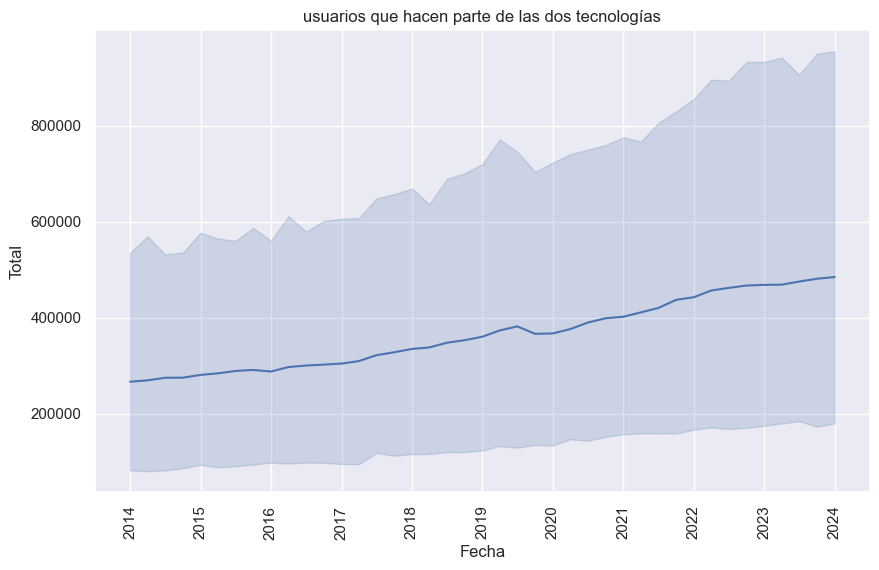

In [60]:
# Grafica del total de usuarios que hacen parte de las dos tecnoligías
plt.figure(figsize=(10,6))
sns.lineplot(x='Fecha', y='Total', data=df_Internet_Dial)
plt.title('usuarios que hacen parte de las dos tecnologías')
plt.xlabel('Fecha')
plt.xticks(rotation= 90)
plt.ylabel('Total')
plt.show()

En el anterior grafico podemos ver un incremento en lo usuarios, y tambien podemos ver una gran disperción de los datos en todo el transcurso del tiempo 

In [61]:
# Hacemos una revición general de los datos
df_Internet_Ingresos.describe()
# Encontramo que hay outliers ya que tenemos un maximo de años de 2033 y seria un valor erroneo

,Año,Trimestre,Ingresos (miles de pesos)
count,41.000000,41.000000,4.100000e+01
mean,2018.878049,2.463415,3.885074e+07
std,3.689140,1.142313,5.422892e+07
min,2014.000000,1.000000,2.984054e+06
25%,2016.000000,1.000000,6.912442e+06
50%,2019.000000,2.000000,2.020741e+07
75%,2021.000000,3.000000,4.299994e+07
max,2033.000000,4.000000,2.804191e+08


In [62]:
# Para poder corregir el error de  los outliers de año lo primero que vamos hacer es extrar el año de la columna periodo 
# creamos un función para que se haga cergo de sacar el año
def extrae_year(Periodo):
    # Divide el periodo para extraer el año
    _, year = Periodo.split()
    return int(year)
# Aplicamos la función para realizar optener el año
df_Internet_Ingresos['Año'] = df_Internet_Ingresos['Periodo'].apply(extrae_year)

In [63]:
# Utilizamos la función de converción de años y trimestres a fechas
df_Internet_Ingresos['Fecha'] = df_Internet_Ingresos.apply(Crear_fecha, axis=1)

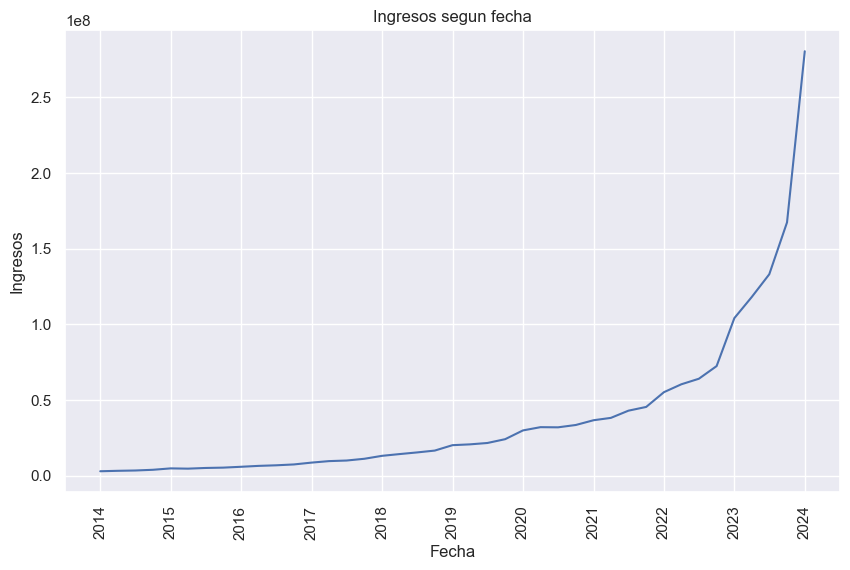

In [64]:
# Grafica de los ingresos por fecha
plt.figure(figsize=(10,6))
sns.lineplot(x='Fecha', y='Ingresos (miles de pesos)', data=df_Internet_Ingresos)
plt.title('Ingresos segun fecha')
plt.xlabel('Fecha')
plt.xticks(rotation= 90)
plt.ylabel('Ingresos')
plt.show()

En el anterior grafico podes ver como los ingreso se an elevado considereblemente en el año 2023 hasta el año actual

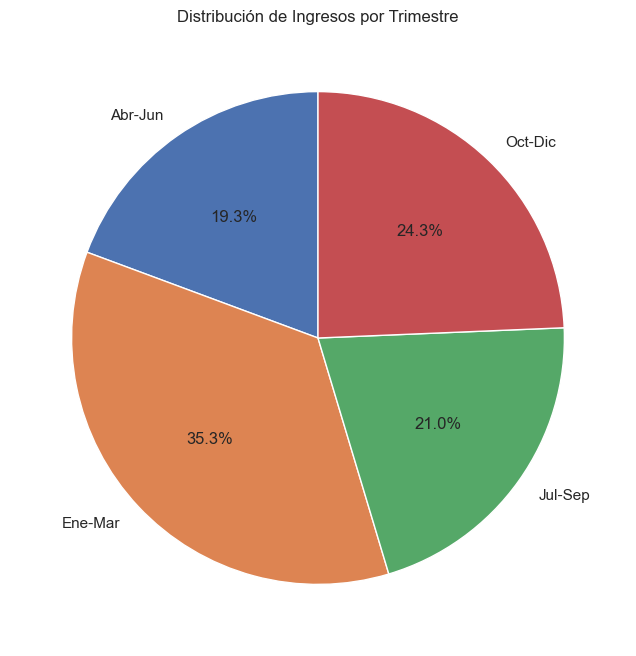

In [65]:
# Mapear los trimestres a nombres más descriptivos
trimestre_map = {1: 'Ene-Mar', 2: 'Abr-Jun', 3: 'Jul-Sep', 4: 'Oct-Dic'}
df_Internet_Ingresos['Trimestre_1'] = df_Internet_Ingresos['Trimestre'].map(trimestre_map)

# Agrupar los ingresos por trimestre
grouped = df_Internet_Ingresos.groupby('Trimestre_1')['Ingresos (miles de pesos)'].sum()
# Crear el gráfico de torta
fig, ax = plt.subplots(figsize=(8, 8))

ax.pie(grouped, labels=grouped.index, autopct='%1.1f%%', startangle=90)

# Título del gráfico
ax.set_title('Distribución de Ingresos por Trimestre')

# Mostrar el gráfico
plt.show()

En el anterior grafico podemos ver la dristribución de ingresos por trimestre, podemos concluir que en el primer trimestre se obtubo mayores ingresos y en el 4 trimestre

In [66]:
# Pasamos las transformaciones a nuevos archivos para realizar el análisis en Power Bi
"""df_Internet_Velocidad.to_excel('Internet_Velocidad.xlsx', index=False) 
df_Internet_ATecnologia.to_excel('Internet_ATecnologia.xlsx', index=False)
df_Internet_PPoblacion.to_excel('Internet_PPoblacion.xlsx', index=False)
df_Internet_PHogares.to_excel('Internet_PHogares.xlsx', index=False) 
df_Internet_AVelocidad.to_excel('Internet_AVelocidad.xlsx', index=False) 
df_Internet_Dial.to_excel('Internet_Dial.xlsx', index=False)
df_Internet_Ingresos.to_excel('Internet_Ingresos.xlsx', index=False)"""